<a href="https://colab.research.google.com/github/jhoselin48/SSF-Oto25JhoselinMarisolConstantinoEstrada/blob/main/SSF_T6_Constantino_Estrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Ejercicio A2 del Langtangen

In [24]:
#Ejercicio A2
# Definición de la función
def f(x, epsilon):
    return np.sin(1.0 / (x + epsilon))
# Función para generar nodos y valores
def compute_function(n, epsilon):
    x = np.linspace(0, 1, n + 1)
    y = f(x, epsilon)
    return x, y

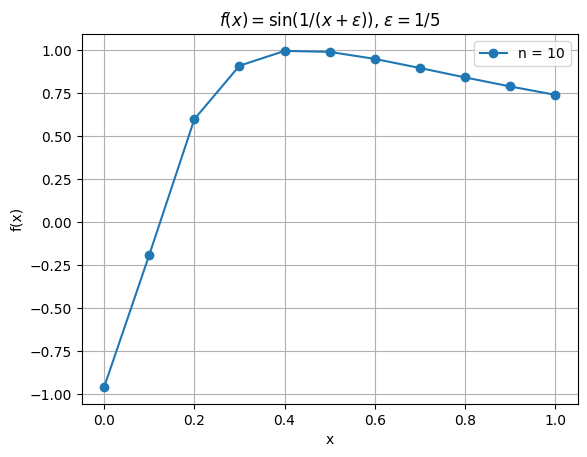

In [25]:
# Ejercicio A2 a) n = 10, epsilon = 1/5
n = 10
epsilon = 1/5

x, y = compute_function(n, epsilon)

plt.figure()
plt.plot(x, y, 'o-', label=f"n = {n}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(r"$f(x)=\sin(1/(x+\varepsilon))$, $\varepsilon=1/5$")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# b) Gráfica para n y n+10
x1, y1 = compute_function(n, epsilon)
x2, y2 = compute_function(n + 10, epsilon)

plt.figure()
plt.plot(x1, y1, 'o-', label=f"n = {n}")
plt.plot(x2, y2, 's--', label=f"n = {n+10}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("f_[n] y f_[n+10]")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# c) Encontrar n tal que la diferencia máxima < 0.1
def find_n(epsilon, tol=0.1):
    n = 10
    diff = np.inf

    while diff > tol:
        # Malla gruesa
        x_coarse, y_coarse = compute_function(n, epsilon)

        # Malla fina
        x_fine, y_fine = compute_function(n + 10, epsilon)

        # Interpolar la función gruesa en la malla fina
        y_coarse_interp = np.interp(x_fine, x_coarse, y_coarse)

        diff = np.max(np.abs(y_fine - y_coarse_interp))
        n += 10

    return n, diff

n_required, max_diff = find_n(epsilon)

print(f"(c) Para epsilon = {epsilon}:")
print(f"n necesario = {n_required}")
print(f"Diferencia máxima = {max_diff}")

(c) Para epsilon = 0.2:
n necesario = 30
Diferencia máxima = 0.08617052255111779


In [ ]:
# d) Repetir c) para epsilon = 1/10
epsilon = 1/10
n_required, max_diff = find_n(epsilon)

print(f"\n(d) Para epsilon = {epsilon}:")
print(f"n necesario = {n_required}")
print(f"Diferencia máxima = {max_diff}")

# e) Repetir c) para epsilon = 1/20
epsilon = 1/20
n_required, max_diff = find_n(epsilon)

print(f"\n(e) Para epsilon = {epsilon}:")
print(f"n necesario = {n_required}")
print(f"Diferencia máxima = {max_diff}")

# f) Discusión
print("\n(f):")
print("A un epsilon más pequeño, la función oscila más cerca de x = 0, por lo que se requiere un n más grande")
print(" n crece aproximadamente como 1/epsilon.")


(d) Para epsilon = 0.1:
n necesario = 80
Diferencia máxima = 0.08535383997692747

(e) Para epsilon = 0.05:
n necesario = 200
Diferencia máxima = 0.0957711723094774

(f):
A un epsilon más pequeño, la función oscila más cerca de x = 0, por lo que se requiere un n más grande
 n crece aproximadamente como 1/epsilon.


Ejercicio A3 del Langtangen

In [16]:
#Ejercicio A3
# Funciones exactas
def g(x, epsilon):
    return np.sin(1.0 / (x + epsilon))

def dg_exact(x, epsilon):
    return -np.cos(1.0 / (x + epsilon)) / (x + epsilon)**2

In [17]:
# Derivada por diferencias finitas centradas
def dg_numeric(x, epsilon):
    h = x[1] - x[0]
    y = g(x, epsilon)
    dg = np.zeros_like(y)

    # Diferencias centradas
    dg[1:-1] = (y[2:] - y[:-2]) / (2*h)

    # Bordes: diferencias adelantada y atrasada
    dg[0] = (y[1] - y[0]) / h
    dg[-1] = (y[-1] - y[-2]) / h

    return dg

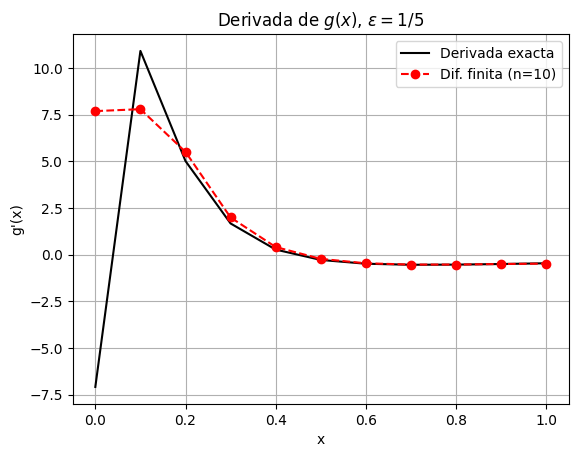

In [18]:
# a) y b) Prueba con n = 10, epsilon = 1/5
n_test = 10
epsilon_test = 1/5

x_nodes = np.linspace(0, 1, n_test + 1)

dg_num = dg_numeric(x_nodes, epsilon_test)
dg_ex = dg_exact(x_nodes, epsilon_test)

plt.figure()
plt.plot(x_nodes, dg_ex, 'k-', label="Derivada exacta")
plt.plot(x_nodes, dg_num, 'ro--', label="Dif. finita (n=10)")
plt.xlabel("x")
plt.ylabel("g'(x)")
plt.title(r"Derivada de $g(x)$, $\varepsilon = 1/5$")
plt.legend()
plt.grid()
plt.show()

In [19]:
# c) Encontrar n tal que el error máximo < 0.1
def find_n_g(epsilon, tol=0.1):
    n_val = 10
    error_max = np.inf

    while error_max > tol:
        x_vals = np.linspace(0, 1, n_val + 1)
        dg_num = dg_numeric(x_vals, epsilon)
        dg_ex = dg_exact(x_vals, epsilon)

        error_max = np.max(np.abs(dg_num - dg_ex))
        n_val += 10

    return n_val, error_max

# c)
n_c, err_c = find_n_g(1/5)
print(f"c) para epsilon = 1/5 n = {n_c}, error máx = {err_c:.4f}")

# d)
n_d, err_d = find_n_g(1/10)
print(f"d) para epsilon = 1/10 n = {n_d}, error máx = {err_d:.4f}")

# e)
n_e, err_e = find_n_g(1/20)
print(f"e) para epsilon = 1/20 n = {n_e}, error máx = {err_e:.4f}")

# f) Observación
print("\n(f):")
print("Al disminuir epsilon, g'(x) se vuelve más oscilatoria y tiene mayor amplitud cerca de x=0.Esto hace que el paso h se haga más pequeño (y n más grande).")
print("El tiempo de ejecución para el cálculo para epsilon 1/20 fue considerablemente mayor que para los casos anteriores :( )).")

c) para epsilon = 1/5 n = 3360, error máx = 0.0998
d) para epsilon = 1/10 n = 18730, error máx = 0.1000


KeyboardInterrupt: 

Ejercicio A4 del Langtangen

In [24]:
# Función a integrar
def j(x):
    return np.exp(4*x)

# Valor exacto de la integral
a_exact = (np.exp(4) - 1) / 4

In [25]:
# Cuadratura de Gauss–Legendre en [0,1]
def gauss_legendre(n):
    # Nodos y pesos en [-1,1]
    xi, wi = np.polynomial.legendre.leggauss(n)

    # Cambio de variable a [0,1]
    x = 0.5*(xi + 1)
    w = 0.5*wi

    return np.sum(w * g(x))

In [26]:
# Buscar n tal que |a_exact - a(n)| <= epsilon
def find_n(epsilon, n_max=50):
    for n in range(1, n_max + 1):
        a_n = gauss_legendre(n)
        error = abs(a_exact - a_n)

        if error <= epsilon:
            return n, a_n, error

    return None, None, None

In [36]:
# a), b), c)
eps_values = [1e-2, 1e-3, 1e-4]

for eps in eps_values:
    n, a_n, err = find_n(eps)
    print(f"epsilon = {eps}")
    print(f"n necesario = {n}")
    print(f"a(n) = {a_n:.4f}")
    print(f"error = {err:.10f}\n")

# (d) Observación
print("d):")
print("La cuadratura de Gauss–Legendre converge muy rápidamente para funciones suaves.")
print("Para funciones analíticas como e^{4x}, el error disminuye casi exponencialmente.")

epsilon = 0.01
n necesario = 4
a(n) = 13.3992
error = 0.0003004582

epsilon = 0.001
n necesario = 4
a(n) = 13.3992
error = 0.0003004582

epsilon = 0.0001
n necesario = 5
a(n) = 13.3995
error = 0.0000033189

d):
La cuadratura de Gauss–Legendre converge muy rápidamente para funciones suaves.
Para funciones analíticas como e^{4x}, el error disminuye casi exponencialmente.


Ejercicio A6 Langtangen

In [37]:
# Función a integrar
def k(x):
    return np.exp(-x**2)

# Valor exacto
I_exact = np.sqrt(np.pi)

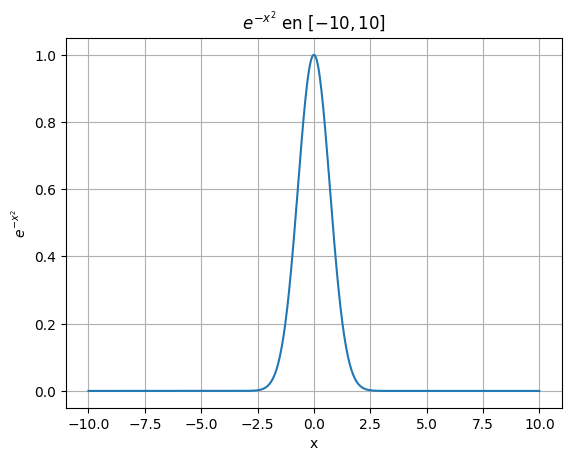

In [38]:
# a) Gráfica de la función
x_plot = np.linspace(-10, 10, 500)
y_plot = k(x_plot)

plt.figure()
plt.plot(x_plot, y_plot)
plt.xlabel("x")
plt.ylabel(r"$e^{-x^2}$")
plt.title(r"$e^{-x^2}$ en $[-10,10]$")
plt.grid()
plt.show()

In [40]:
# Cuadratura de Gauss–Legendre para T(n,L)
def T_gauss_legendre(n, L):
    xi, wi = np.polynomial.legendre.leggauss(n)

    # Escalamiento de [-1,1] a [0,L]
    x = 0.5 * L * (xi + 1)
    w = 0.5 * L * wi

    integral_0_L = np.sum(w * g(x))
    return 2 * integral_0_L

In [45]:
# (c) Tabla de valores de T(n,L)
n_values = [100, 200, 300, 400, 500]
L_values = [2, 4, 6, 8, 10]

T_table = np.zeros((len(n_values), len(L_values)))
E_table = np.zeros((len(n_values), len(L_values)))

for i, n in enumerate(n_values):
    for j, L in enumerate(L_values):
        Tnl = T_gauss_legendre(n, L)
        T_table[i, j] = Tnl
        E_table[i, j] = abs(I_exact - Tnl)

# Convertir a DataFrame
T_df = pd.DataFrame(
    T_table, index=n_values, columns=L_values
)

E_df = pd.DataFrame(
    E_table, index=n_values, columns=L_values
)

print("Tabla de T(n, L):")
display(T_df)

print("\n\nTabla de errores |I - T(n, L)|:")
display(E_df)

Tabla de T(n, L):


,2,4,6,8,10
100,1489.978994,4.443055e+06,1.324456e+10,3.948148e+13,1.176926e+17
200,1489.978994,4.443055e+06,1.324456e+10,3.948148e+13,1.176926e+17
300,1489.978994,4.443055e+06,1.324456e+10,3.948148e+13,1.176926e+17
400,1489.978994,4.443055e+06,1.324456e+10,3.948148e+13,1.176926e+17
500,1489.978994,4.443055e+06,1.324456e+10,3.948148e+13,1.176926e+17




Tabla de errores |I - T(n, L)|:


,2,4,6,8,10
100,1488.20654,4.443053e+06,1.324456e+10,3.948148e+13,1.176926e+17
200,1488.20654,4.443053e+06,1.324456e+10,3.948148e+13,1.176926e+17
300,1488.20654,4.443053e+06,1.324456e+10,3.948148e+13,1.176926e+17
400,1488.20654,4.443053e+06,1.324456e+10,3.948148e+13,1.176926e+17
500,1488.20654,4.443053e+06,1.324456e+10,3.948148e+13,1.176926e+17


In [47]:
#Observación
print("La precisión depende tanto del número de nodos n como de la truncación L del dominio infinito.")
print("Gauss–Legendre converge rápidamente en n, pero si L es pequeño el error de truncación domina.")

La precisión depende tanto del número de nodos n como de la truncación L del dominio infinito.
Gauss–Legendre converge rápidamente en n, pero si L es pequeño el error de truncación domina.


Ejercicio 3 usando scipy

In [48]:
from scipy.integrate import fixed_quad
# Función a integrar
def g(x):
    return np.exp(-x**2)

# Valor exacto de la integral
I_exact = np.sqrt(np.pi)

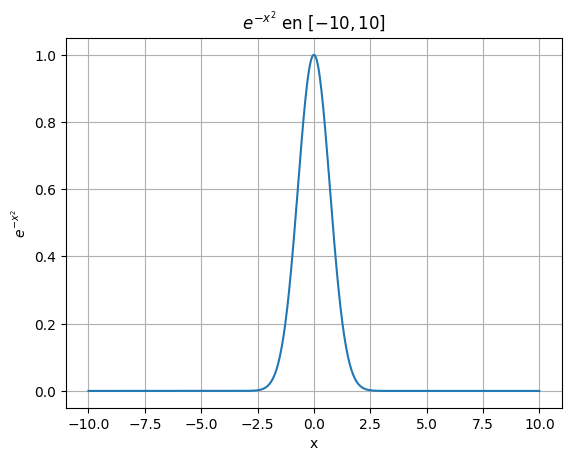

In [49]:
# (a) Gráfica de la función
x_plot = np.linspace(-10, 10, 500)
y_plot = g(x_plot)

plt.figure()
plt.plot(x_plot, y_plot)
plt.xlabel("x")
plt.ylabel(r"$e^{-x^2}$")
plt.title(r"$e^{-x^2}$ en $[-10,10]$")
plt.grid()
plt.show()

In [50]:
# Cuadratura de Gauss–Legendre usando SciPy
def T_gauss_scipy(n, L):
    # fixed_quad devuelve (valor, None)
    val, _ = fixed_quad(g, 0, L, n=n)
    return 2 * val

In [51]:
# c) Tablas de valores T(n,L) y errores
n_values = [100, 200, 300, 400, 500]
L_values = [2, 4, 6, 8, 10]

T_table = np.zeros((len(n_values), len(L_values)))
E_table = np.zeros((len(n_values), len(L_values)))

for i, n in enumerate(n_values):
    for j, L in enumerate(L_values):
        Tnl = T_gauss_scipy(n, L)
        T_table[i, j] = Tnl
        E_table[i, j] = abs(I_exact - Tnl)

# Convertir a DataFrame
T_df = pd.DataFrame(
    T_table, index=n_values, columns=L_values
)

E_df = pd.DataFrame(
    E_table, index=n_values, columns=L_values
)

print("Tabla de T(n, L) usando SciPy (Gauss–Legendre):")
display(T_df)

print("Tabla de errores |I - T(n, L)|:")
display(E_df)

Tabla de T(n, L) usando SciPy (Gauss–Legendre):


,2,4,6,8,10
100,1.764163,1.772454,1.772454,1.772454,1.772454
200,1.764163,1.772454,1.772454,1.772454,1.772454
300,1.764163,1.772454,1.772454,1.772454,1.772454
400,1.764163,1.772454,1.772454,1.772454,1.772454
500,1.764163,1.772454,1.772454,1.772454,1.772454


Tabla de errores |I - T(n, L)|:


,2,4,6,8,10
100,0.008291,2.732638e-08,3.552714e-15,4.440892e-15,5.107026e-15
200,0.008291,2.732640e-08,3.286260e-14,4.818368e-14,6.261658e-14
300,0.008291,2.732644e-08,1.194600e-13,1.769696e-13,2.331468e-13
400,0.008291,2.732644e-08,1.154632e-13,1.696421e-13,2.244871e-13
500,0.008291,2.732639e-08,1.443290e-14,1.842970e-14,2.153833e-14


In [52]:
# Observación
print("Con fixed_quad, la convergencia en n es muy rápida.")
print("Sin embargo, el error total sigue dependiendo del truncamiento L.")
print("Si L es pequeño, el error está dominado por la integral del tail infinito.")

Con fixed_quad, la convergencia en n es muy rápida.
Sin embargo, el error total sigue dependiendo del truncamiento L.
Si L es pequeño, el error está dominado por la integral del tail infinito.
